## Bravo7_dynamics noFT

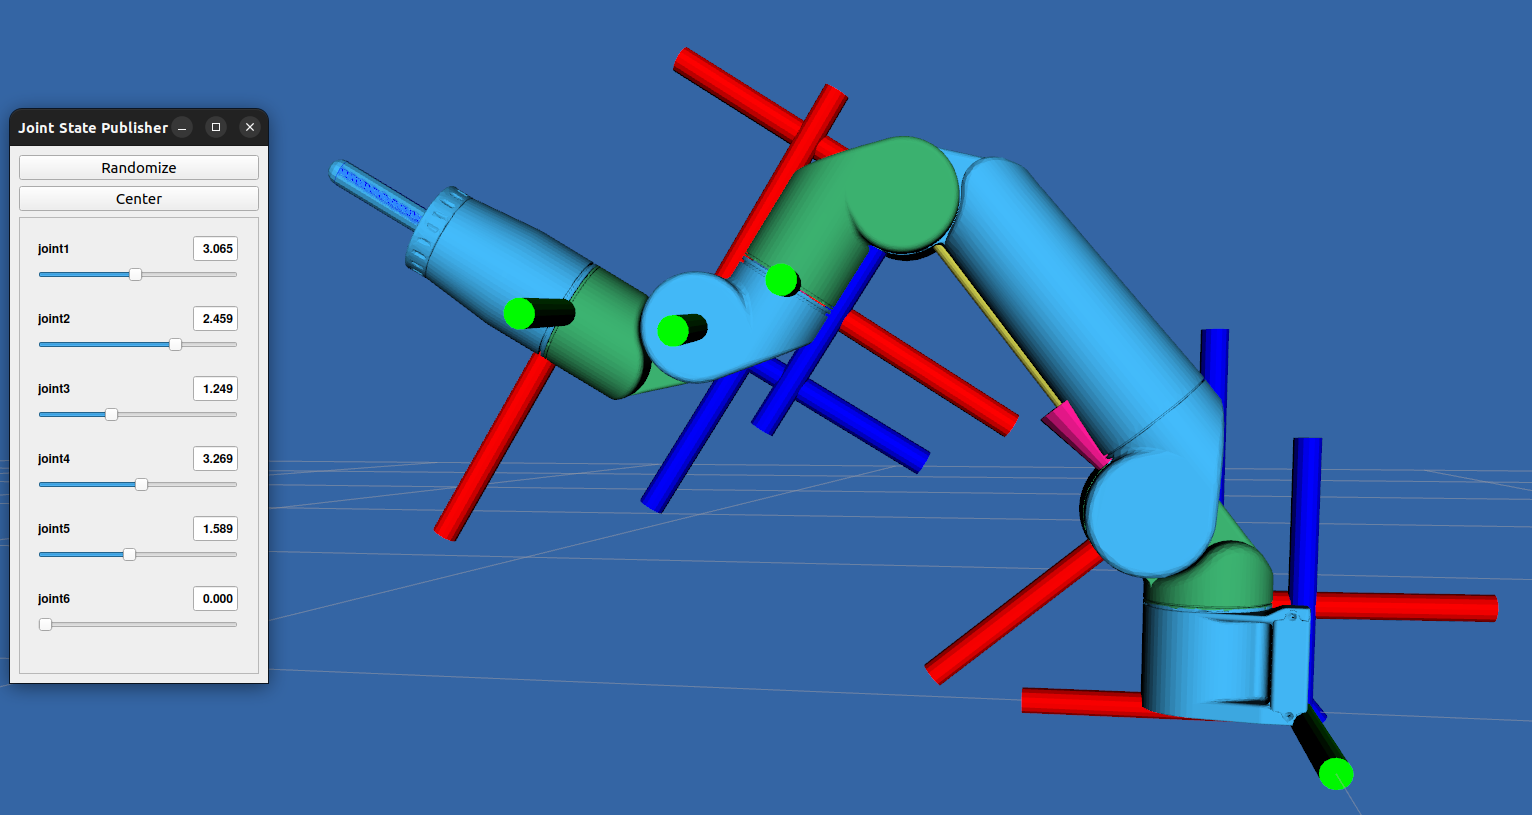

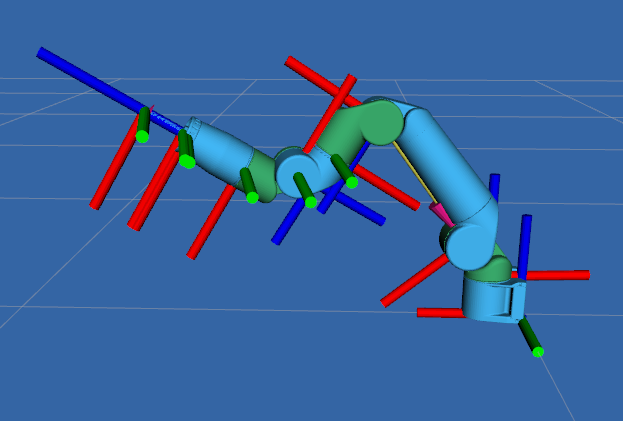

## URDF AMIR

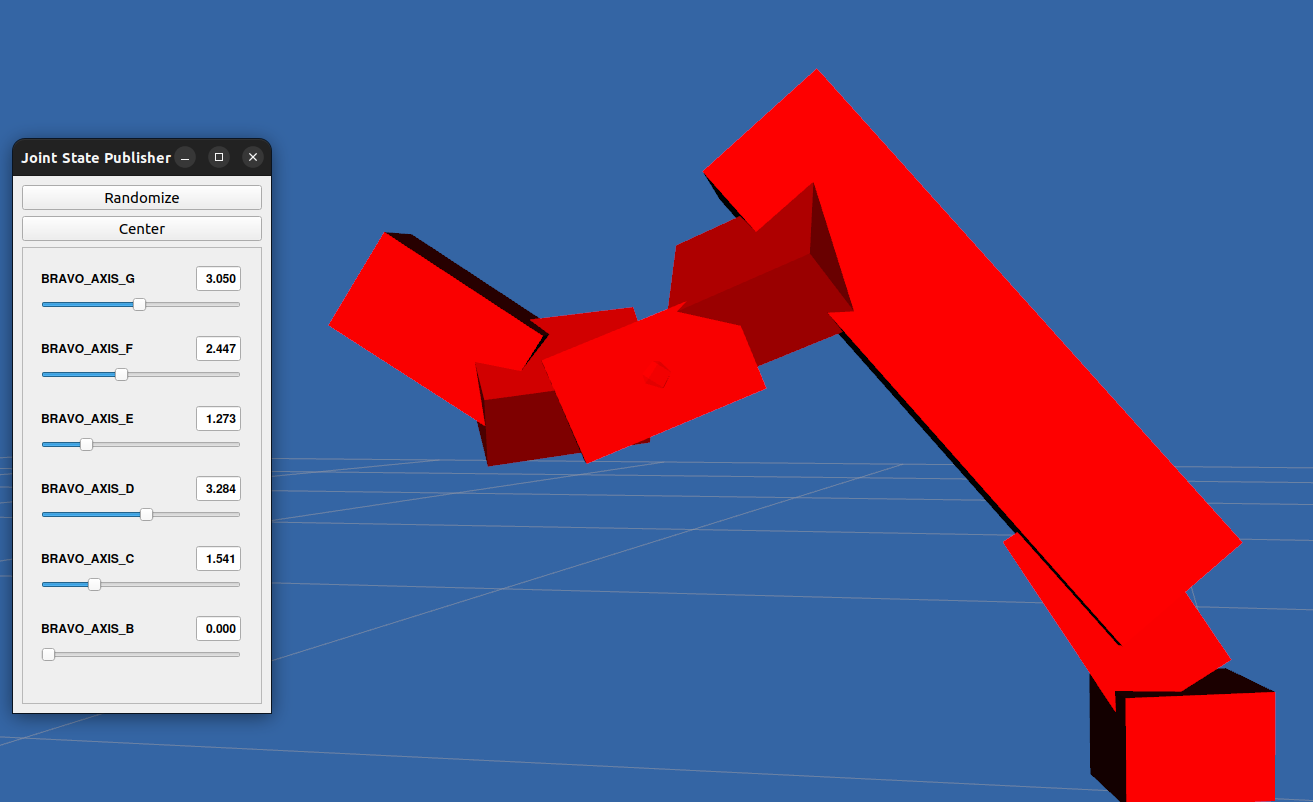

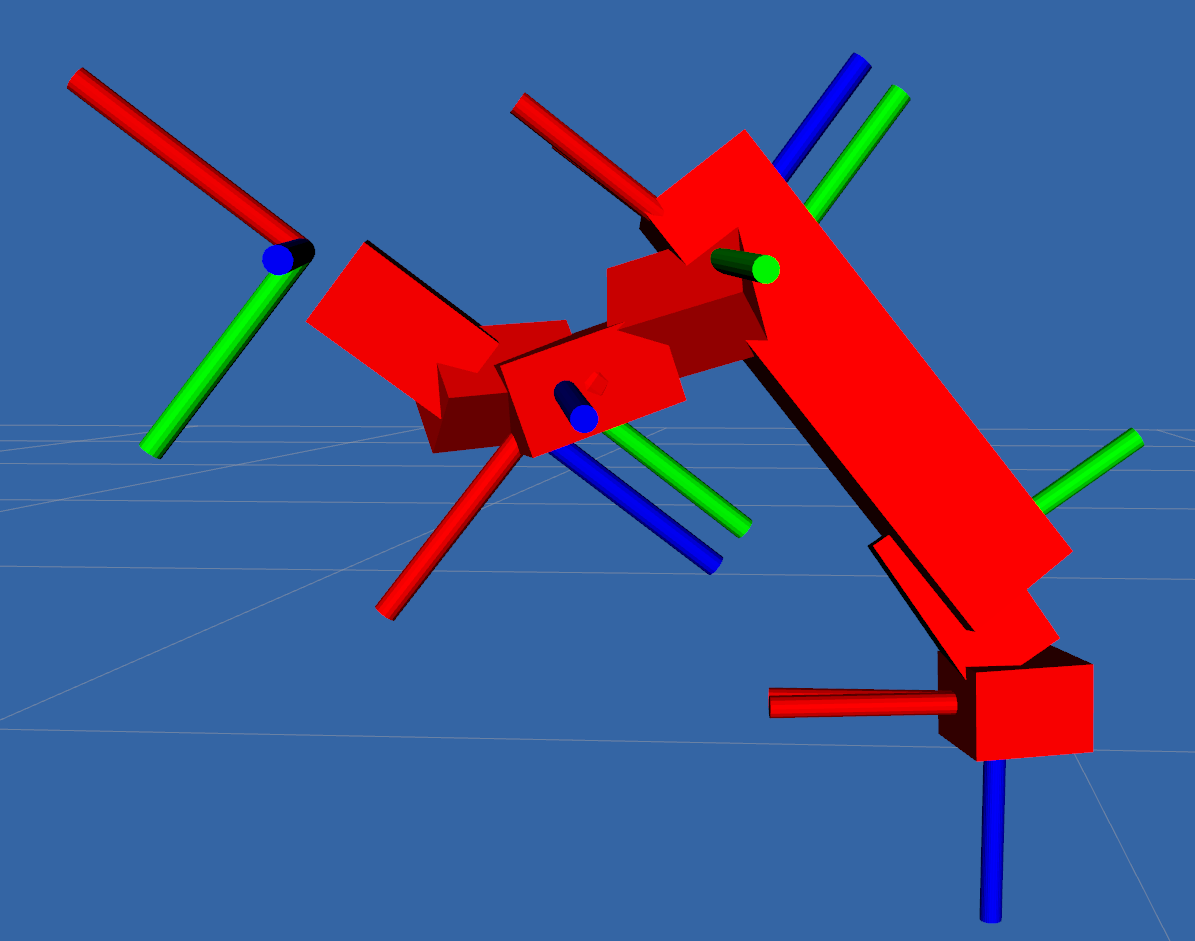

## DH generated by gemini

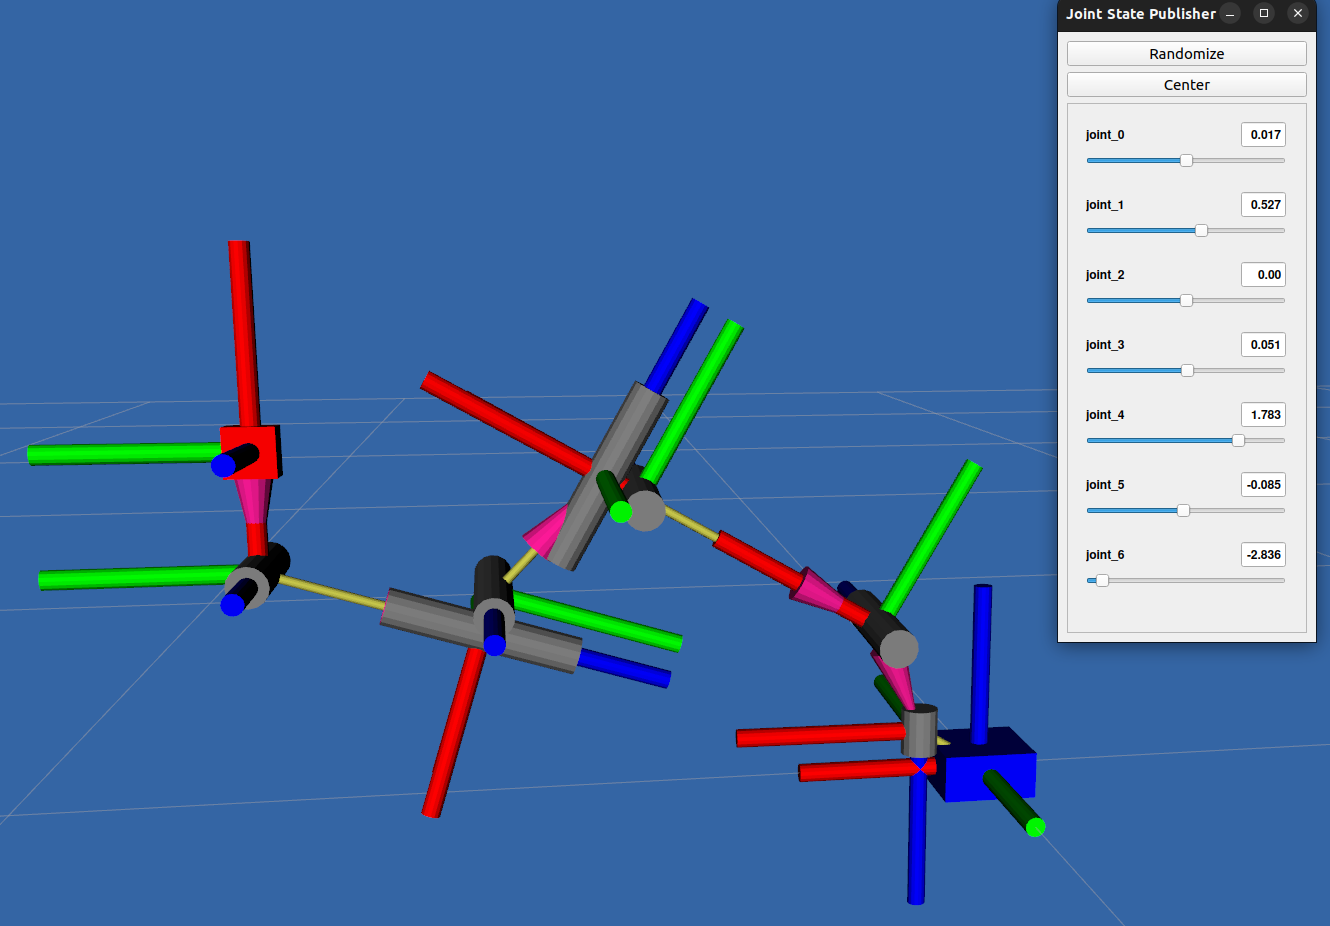

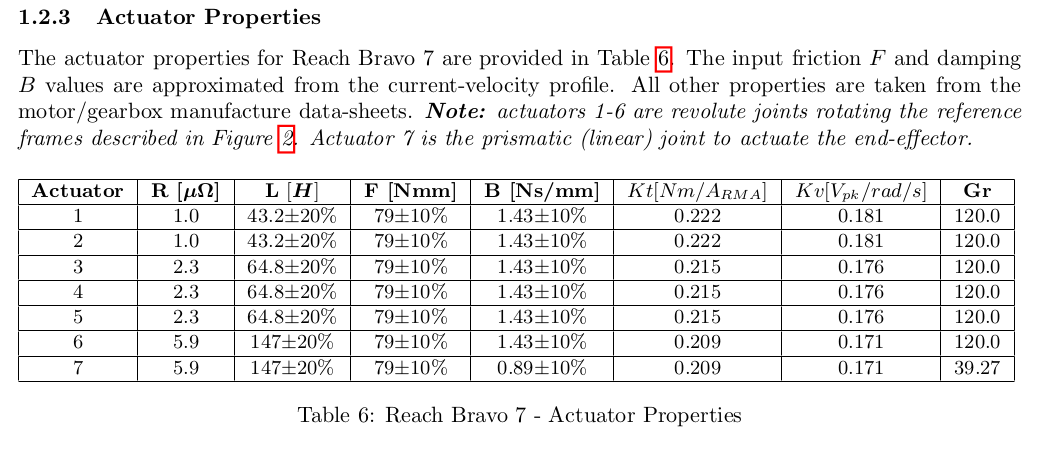

Actuator: This is simply the identifier for each motor/joint assembly, numbered 1 through 7. The text notes that actuators 1-6 are revolute (rotational) joints, while actuator 7 is a prismatic (linear) joint for the end-effector.

R [muOmega]: This is the electrical resistance of the motor windings, measured in micro-ohms (muOmega). It represents the opposition to direct current flow and is a primary source of energy loss in the motor, converted into heat (P=I2R).

L [H]: This stands for electrical inductance, measured in Henries (H), although the values shown are likely in microhenries (muH). Inductance is the property of the motor windings to oppose changes in electric current. It affects the motor's electrical time constant, influencing how quickly the motor current (and thus torque) can change.

F [Nmm]: This represents the static friction (also known as Coulomb friction) within the actuator and gearbox, measured in Newton-millimeters (Nmm). This is a resistive torque that is constant and opposes the direction of motion.

B [Ns/mm] or [Nms/rad]: This is the viscous damping coefficient. It models a resistive force or torque that is proportional to the actuator's velocity. This effect arises from things like lubrication within the gearbox.

    For the prismatic joint (Actuator 7), the unit Newton-seconds per millimeter (Ns/mm) is appropriate.

    For the revolute joints (1-6), the unit would conceptually be Newton-meter-seconds per radian (Nms/rad), even though the table uses a linear unit for all.

Kt [Nm/A<sub>RMA</sub>]: This is the torque constant. It's a fundamental parameter of a motor that defines how much output torque is generated for a given amount of input current (T=K_tcdotI). It is measured in Newton-meters per ampere (Nm/A).

Kv [V<sub>pk</sub>/rad/s]: This is the back-EMF constant (or voltage constant). It relates the rotational speed of the motor to the voltage it generates internally, known as back-electromotive force (back-EMF). This voltage opposes the supply voltage. It's measured in volts per radian per second (V/(rad/s)).

Gr: This is the gear ratio. It is a dimensionless number that indicates how much the gearbox reduces the speed and, consequently, increases the torque from the motor to the output joint. For example, a gear ratio of 120 means the output speed is 1/120th of the motor speed, and the output torque is (ideally) 120 times the motor torque.

## Stiction Example
The stiction torque is 0.079Nm, the Kt is 0.222 Nm/A, therefore, for the first joint in theory we will require 356 mA. WHICH MAKES TOTAL SENSE!


In [1]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pinocchio
import numpy as np

In [2]:

model_amir = pinocchio.buildModelFromUrdf("/home/carlos/reach_bravo_7_ws/src/reach-bravo-7/bpl_bravo_description/urdf/bravo_7_amir_original.urdf")
data_amir = model_amir.createData()

In [3]:
model_carlos = pinocchio.buildModelFromUrdf("/home/carlos/reach_bravo_7_ws/src/reach-bravo-7/bpl_bravo_description/urdf/bravo_7_noFT_pinocchio.urdf")
data_carlos = model_carlos.createData()

In [4]:
for name in model_amir.names:
    print(name)


universe
BRAVO_AXIS_G
BRAVO_AXIS_F
BRAVO_AXIS_E
BRAVO_AXIS_D
BRAVO_AXIS_C
BRAVO_AXIS_B


In [5]:
for name in model_carlos.names:
    print(name)


universe
joint1
joint2
joint3
joint4
joint5
joint6


In [6]:
q = pinocchio.randomConfiguration(model_amir)


In [7]:
type(q)

numpy.ndarray

In [8]:
pinocchio.computeFrameJacobian(model_amir, data_amir, q, "bravo_7_amir_original/arm_1_l")

ArgumentError: Python argument types in
    pinocchio.pinocchio_pywrap_default.computeFrameJacobian(Model, Data, numpy.ndarray, str)
did not match C++ signature:
    computeFrameJacobian(pinocchio::ModelTpl<double, 0, pinocchio::JointCollectionDefaultTpl> model, pinocchio::DataTpl<double, 0, pinocchio::JointCollectionDefaultTpl> {lvalue} data, Eigen::Matrix<double, -1, 1, 0, -1, 1> q, unsigned long frame_id)
    computeFrameJacobian(pinocchio::ModelTpl<double, 0, pinocchio::JointCollectionDefaultTpl> model, pinocchio::DataTpl<double, 0, pinocchio::JointCollectionDefaultTpl> {lvalue} data, Eigen::Matrix<double, -1, 1, 0, -1, 1> q, unsigned long frame_id, pinocchio::ReferenceFrame reference_frame)

In [9]:
t = 0
for i in model_amir.frames:
    print(i.name)
    print(t)
    t += 1


universe
0
DH-FRAME-0
1
DH-JOINT-0-1
2
DH-FRAME-0-1
3
DH-JOINT-0-2
4
DH-FRAME-1
5
BRAVO_AXIS_G
6
DH-FRAME-1-1
7
DH-JOINT-1-1
8
DH-FRAME-1-2
9
DH-JOINT-1-2
10
DH-FRAME-2
11
BRAVO_AXIS_F
12
DH-FRAME-2-1
13
DH-JOINT-2-1
14
DH-FRAME-2-2
15
DH-JOINT-2-2
16
DH-FRAME-3
17
BRAVO_AXIS_E
18
DH-FRAME-3-1
19
DH-JOINT-3-1
20
DH-FRAME-3-2
21
DH-JOINT-3-2
22
DH-FRAME-4
23
BRAVO_AXIS_D
24
DH-FRAME-4-1
25
DH-JOINT-4-1
26
DH-FRAME-4-2
27
DH-JOINT4-2
28
DH-FRAME-5
29
BRAVO_AXIS_C
30
DH-FRAME-5-1
31
DH-JOINT-5-1
32
DH-FRAME-5-2
33
DH-JOINT-5-2
34
DH-FRAME-6
35
BRAVO_AXIS_B
36
DH-FRAME-6-1
37
DH-JOINT-6-1
38
DH-FRAME-6-2
39
DH-JOINT-7
40
DH-FRAME-7
41
EE-JOINT
42
EE
43
LINK-6-JOINT
44
LINK-6
45
LINK-5-JOINT
46
LINK-5
47
LINK-4-JOINT
48
LINK-4
49
LINK-3-JOINT
50
LINK-3
51
LINK-2-JOINT
52
LINK-2
53
LINK-1-JOINT
54
LINK-1
55
LINK-0-JOINT
56
LINK-0
57


In [10]:
model_amir.frames[42].name

'EE-JOINT'

In [11]:
j =0
for i in model_carlos.frames:
    print(i.name)
    print(j)
    j += 1



universe
0
bravo_base_link
1
base_fixed
2
link1
3
joint1
4
link2
5
joint2
6
link3
7
joint3
8
link4
9
joint4
10
link5
11
joint5
12
link6
13
joint6
14
link7
15
bravo_jaws_joint
16
bravo_jaws_base_link
17
contact_point_joint
18
contact_point
19
tool
20
end_effector
21


In [12]:
q = pinocchio.randomConfiguration(model_carlos)


In [13]:
pinocchio.computeFrameJacobian(model_carlos, data_carlos, q, 21) 

array([[ 0.28688357, -0.19974551, -0.0287202 , -0.09318166,  0.00834827,
         0.        ],
       [-0.17559086, -0.23945452, -0.03865266,  0.00378616,  0.20546036,
         0.        ],
       [-0.00140099,  0.23305607,  0.11109173,  0.        , -0.04080024,
         0.        ],
       [ 0.09162006,  0.74991815,  0.74991815, -0.00231486, -0.99917554,
         0.        ],
       [ 0.15753562, -0.66055279, -0.66055279, -0.0569714 ,  0.04059851,
         0.        ],
       [-0.98325393, -0.03595515, -0.03595515,  0.99837313,  0.        ,
        -1.        ]])

In [15]:
pinocchio.computeFrameJacobian(model_amir, data_amir, q, 42)

array([[-1.39681269e-03,  2.33161760e-01,  1.11106441e-01,
        -1.60367107e-06, -4.07985254e-02, -0.00000000e+00],
       [ 2.89867311e-01, -2.11913689e-01, -4.07579696e-02,
        -9.42375823e-02,  9.10107824e-03,  0.00000000e+00],
       [-1.77350719e-01, -2.53270661e-01, -5.23175200e-02,
         3.83191361e-03,  2.23975437e-01,  0.00000000e+00],
       [-9.83251585e-01, -3.59400111e-02, -3.59400111e-02,
         9.98372601e-01, -1.23915152e-05, -1.00000000e+00],
       [ 9.16469633e-02,  7.49920340e-01,  7.49920340e-01,
        -2.33391932e-03, -9.99175541e-01,  6.32679490e-06],
       [ 1.57534614e-01, -6.60551133e-01, -6.60551133e-01,
        -5.69798473e-02,  4.05985109e-02,  6.32679490e-06]])

In [16]:
pinocchio.computeFrameJacobian(model_carlos, data_carlos, q, 21) - pinocchio.computeFrameJacobian(model_amir, data_amir, q, 42)

array([[ 2.88280385e-01, -4.32907271e-01, -1.39826644e-01,
        -9.31800556e-02,  4.91467928e-02,  0.00000000e+00],
       [-4.65458173e-01, -2.75408288e-02,  2.10531142e-03,
         9.80237405e-02,  1.96359280e-01,  0.00000000e+00],
       [ 1.75949734e-01,  4.86326727e-01,  1.63409248e-01,
        -3.83191361e-03, -2.64775672e-01,  0.00000000e+00],
       [ 1.07487165e+00,  7.85858163e-01,  7.85858163e-01,
        -1.00068746e+00, -9.99163149e-01,  1.00000000e+00],
       [ 6.58886581e-02, -1.41047313e+00, -1.41047313e+00,
        -5.46374777e-02,  1.03977405e+00, -6.32679490e-06],
       [-1.14078854e+00,  6.24595981e-01,  6.24595981e-01,
         1.05535297e+00, -4.05985109e-02, -1.00000633e+00]])

In [53]:
type(pinocchio.computeFrameJacobian(model_amir, data_amir, q, 42))

numpy.ndarray

In [57]:
pinocchio.computeFrameJacobian(model_amir, data_amir, q, 42).shape

(6, 6)